In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Statewise Inventory of Geological Resources of Coal- Statewise production of raw coal and lignite for the last 5 years.csv')
display(df)
# Statewise Inventory of Geological Resources of Coal- Statewise production of raw coal and lignite for the last 5 years

,Rowid,Country,State lgd code,State,Year,Coal type,Quantity of coal and lignite produced,Value of coal and lignite produced
0,1,India,1,Jammu And Kashmir,2015-16,Coal,0.012684,26.928187
1,2,India,1,Jammu And Kashmir,2016-17,Coal,0.009757,20.781535
2,3,India,1,Jammu And Kashmir,2017-18,Coal,0.013659,30.342993
3,4,India,1,Jammu And Kashmir,2018-19,Coal,0.012684,25.172001
4,5,India,1,Jammu And Kashmir,2019-20,Coal,0.013659,25.172001
...,...,...,...,...,...,...,...,...
70,71,India,37,Ladakh,2015-16,Coal,0.000316,0.671813
71,72,India,37,Ladakh,2016-17,Coal,0.000243,0.518465
72,73,India,37,Ladakh,2017-18,Coal,0.000341,0.757007
73,74,India,37,Ladakh,2018-19,Coal,0.000316,0.627999


Insights into Data  

In [3]:
df.describe()

,Rowid,State lgd code,Quantity of coal and lignite produced,Value of coal and lignite produced
count,75.000000,75.0000,73.000000,73.000000
mean,38.000000,21.0000,50.057315,72197.091781
std,21.794495,9.7883,54.234316,73120.978323
min,1.000000,1.0000,0.000243,0.518465
25%,19.500000,17.0000,8.223000,9815.100000
50%,38.000000,21.0000,24.227000,49168.000000
75%,56.500000,27.0000,107.714000,121010.100000
max,75.000000,37.0000,161.893000,272123.700000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rowid                                  75 non-null     int64  
 1   Country                                75 non-null     object 
 2   State lgd code                         75 non-null     int64  
 3   State                                  75 non-null     object 
 4   Year                                   75 non-null     object 
 5   Coal type                              75 non-null     object 
 6   Quantity of coal and lignite produced  73 non-null     float64
 7   Value of coal and lignite produced     73 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.8+ KB


Finding null values


In [5]:
x=df.isna().sum()   #df. isna(). sum() returns the number of missing values in each column.
print(x)

Rowid                                    0
Country                                  0
State lgd code                           0
State                                    0
Year                                     0
Coal type                                0
Quantity of coal and lignite produced    2
Value of coal and lignite produced       2
dtype: int64


Finding unique values

In [6]:
for col in df.columns.values:
  unique_val = pd.unique(df[col])
  print('Column ' + '"'+ col+'"'  + ' has ' + str(len(unique_val)) + ' unique values')

Column "Rowid" has 75 unique values
Column "Country" has 1 unique values
Column "State lgd code" has 15 unique values
Column "State" has 15 unique values
Column "Year" has 5 unique values
Column "Coal type" has 2 unique values
Column "Quantity of coal and lignite produced" has 70 unique values
Column "Value of coal and lignite produced" has 71 unique values


Statewise reserves

In [7]:
states=df['State'].unique()
print(states)

['Jammu And Kashmir' 'Rajasthan' 'Uttar Pradesh' 'Meghalaya' 'Assam'
 'West Bengal' 'Jharkhand' 'Odisha' 'Chhattisgarh' 'Madhya Pradesh'
 'Gujarat' 'Maharashtra' 'Tamil Nadu' 'Telangana' 'Ladakh']


In [11]:
dfq = df.groupby('State').apply(lambda x: x['Quantity of coal and lignite produced'].unique().sum())
print(dfq)
print('\n')
dfv = df.groupby('State').apply(lambda x: x['Value of coal and lignite produced'].unique().sum())
print(dfv)

State
Assam                  3.169000
Chhattisgarh         731.314000
Gujarat               57.372000
Jammu And Kashmir      0.036099
Jharkhand            637.228000
Ladakh                 0.000901
Madhya Pradesh       569.241000
Maharashtra          225.693000
Meghalaya                   NaN
Odisha               708.476000
Rajasthan             44.165000
Tamil Nadu           120.557000
Telangana            314.589000
Uttar Pradesh         85.359000
West Bengal          149.408000
dtype: float64


State
Assam                9.991800e+03
Chhattisgarh         6.402582e+05
Gujarat              6.639510e+04
Jammu And Kashmir    1.032247e+02
Jharkhand            1.185409e+06
Ladakh               2.575284e+00
Madhya Pradesh       8.349706e+05
Maharashtra          3.750028e+05
Meghalaya                     NaN
Odisha               6.206652e+05
Rajasthan            6.310120e+04
Tamil Nadu           2.355187e+05
Telangana            6.781920e+05
Uttar Pradesh        1.095021e+05
West Bengal    

Quantity of coal produced in sorted order

In [12]:
dfqs=dfq.sort_values()
print(dfqs)

State
Ladakh                 0.000901
Jammu And Kashmir      0.036099
Assam                  3.169000
Rajasthan             44.165000
Gujarat               57.372000
Uttar Pradesh         85.359000
Tamil Nadu           120.557000
West Bengal          149.408000
Maharashtra          225.693000
Telangana            314.589000
Madhya Pradesh       569.241000
Jharkhand            637.228000
Odisha               708.476000
Chhattisgarh         731.314000
Meghalaya                   NaN
dtype: float64


In [15]:
dfvs=dfv.sort_values()
print(dfvs)

State
Ladakh               2.575284e+00
Jammu And Kashmir    1.032247e+02
Assam                9.991800e+03
Rajasthan            6.310120e+04
Gujarat              6.639510e+04
Uttar Pradesh        1.095021e+05
Tamil Nadu           2.355187e+05
Maharashtra          3.750028e+05
West Bengal          4.140298e+05
Odisha               6.206652e+05
Chhattisgarh         6.402582e+05
Telangana            6.781920e+05
Madhya Pradesh       8.349706e+05
Jharkhand            1.185409e+06
Meghalaya                     NaN
dtype: float64


<AxesSubplot:xlabel='State', ylabel='Coal reserved quantity(in million tonnes)'>

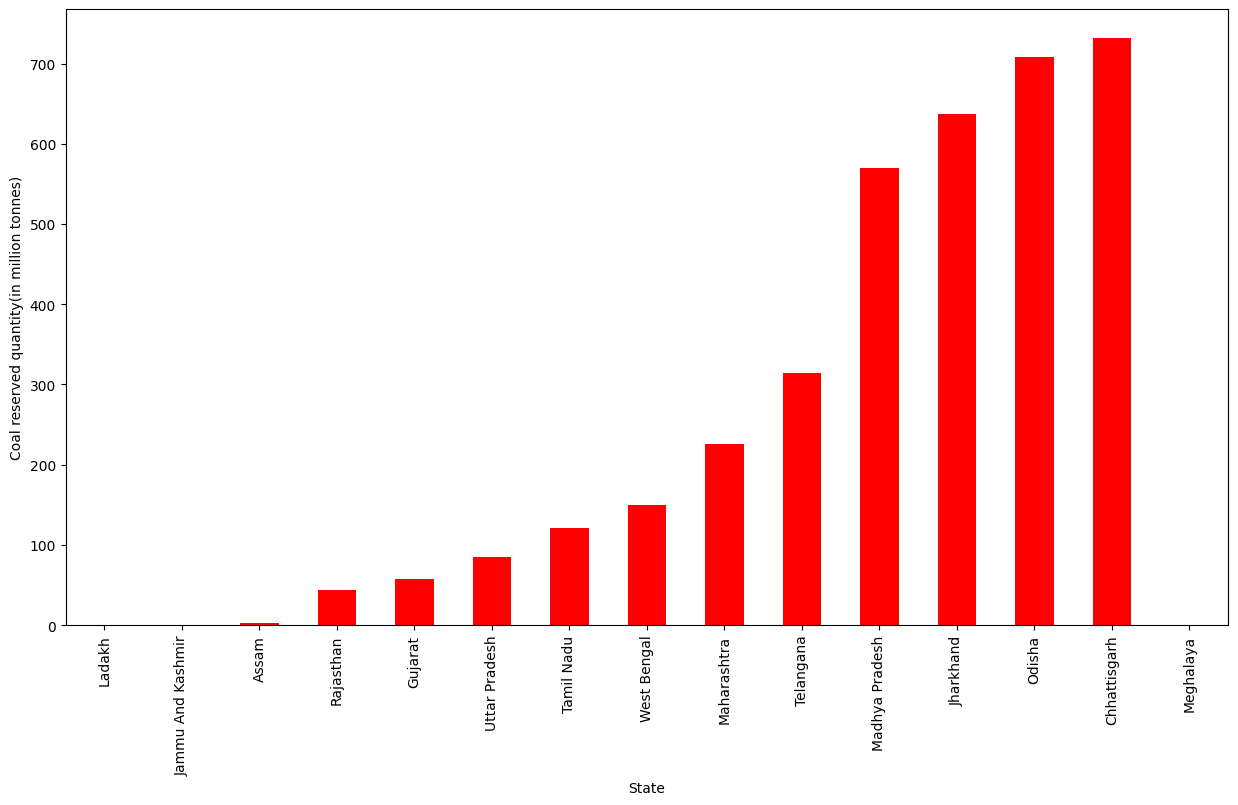

In [17]:
dfqs.plot(kind='bar', y='Quantity of coal and lignite produced',figsize=(15,8),ylabel='Coal reserved quantity(in million tonnes)',color='red')
# dfvs.plot(kind='bar', y='Value of coal and lignite produced',figsize=(15,8),ylabel='Coal reserved quantity(in million tonnes)',color='blue')

<AxesSubplot:xlabel='State', ylabel='Coal reserved quantity(in million tonnes)'>

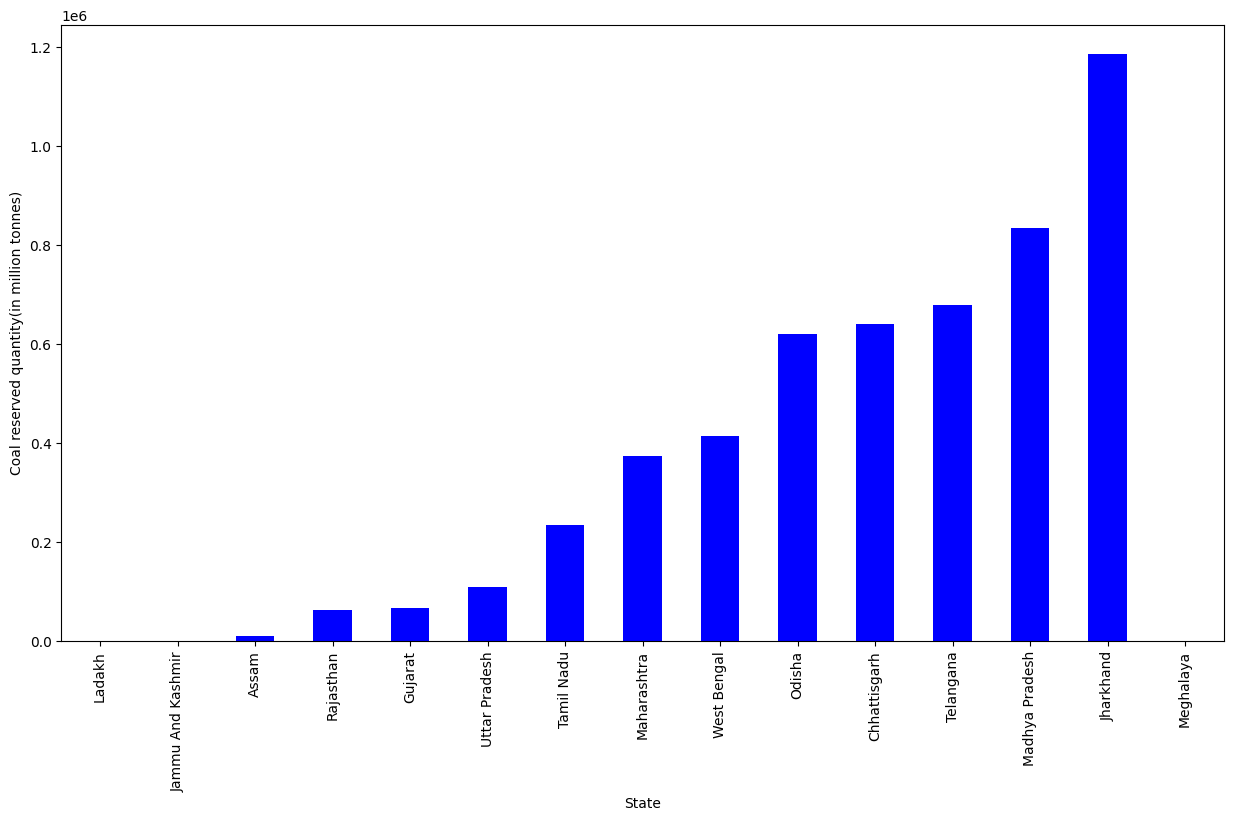

In [18]:
dfvs.plot(kind='bar', y='Value of coal and lignite produced',figsize=(15,8),ylabel='Coal reserved quantity(in million tonnes)',color='blue')

In [20]:
dfy = df.groupby('Year').apply(lambda x: x['Value of coal and lignite produced'].unique().sum())
print(dfy)
dfy2 = df.groupby('Year').apply(lambda x: x['Quantity of coal and lignite produced'].unique().sum())
print(dfy2)

Year
2015-16     958816.9
2016-17     910067.6
2017-18    1055141.7
2018-19          NaN
2019-20          NaN
dtype: float64
Year
2015-16    683.072
2016-17    703.098
2017-18    722.044
2018-19        NaN
2019-20        NaN
dtype: float64


Text(0, 0.5, 'Quantity of coal and lignite produced')

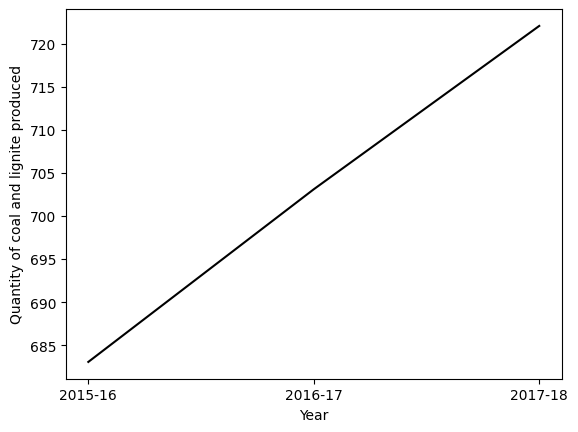

In [23]:
# plt.plot(dfy,'red')
# plt.xlabel("Year")
# plt.ylabel("Value of coal and lignite produced")

plt.plot(dfy2,'black')
plt.xlabel("Year")
plt.ylabel("Quantity of coal and lignite produced")

Text(0, 0.5, 'Value of coal and lignite produced')

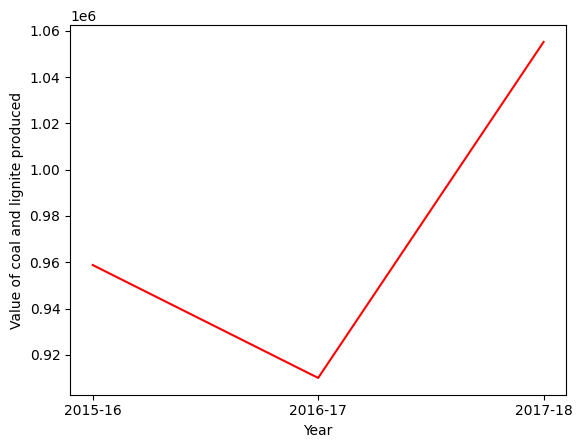

In [24]:
plt.plot(dfy,'red')
plt.xlabel("Year")
plt.ylabel("Value of coal and lignite produced")

C:\Users\Satush\AppData\Local\Temp\ipykernel_11868\3437844175.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Coal type']).sum().plot(kind='pie', y='Value of coal and lignite produced',autopct='%1.0f%%',figsize=(10,10),xlabel="Type of coal ",startangle=15)
C:\Users\Satush\AppData\Local\Temp\ipykernel_11868\3437844175.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Coal type']).sum().plot(kind='pie', y='Quantity of coal and lignite produced',autopct='%1.0f%%',figsize=(10,10),xlabel="Type of coal ",startangle=15)
C:\Users\Satush\AppData\Local\Temp\ipykernel_11868\3437844175.py:

<AxesSubplot:ylabel='Quantity of coal and lignite produced'>

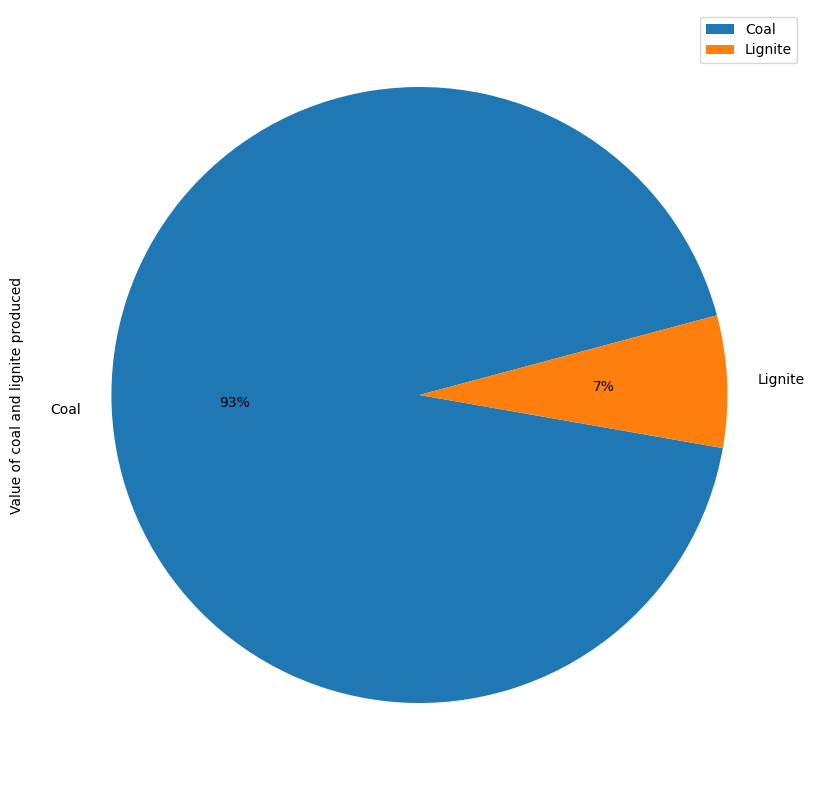

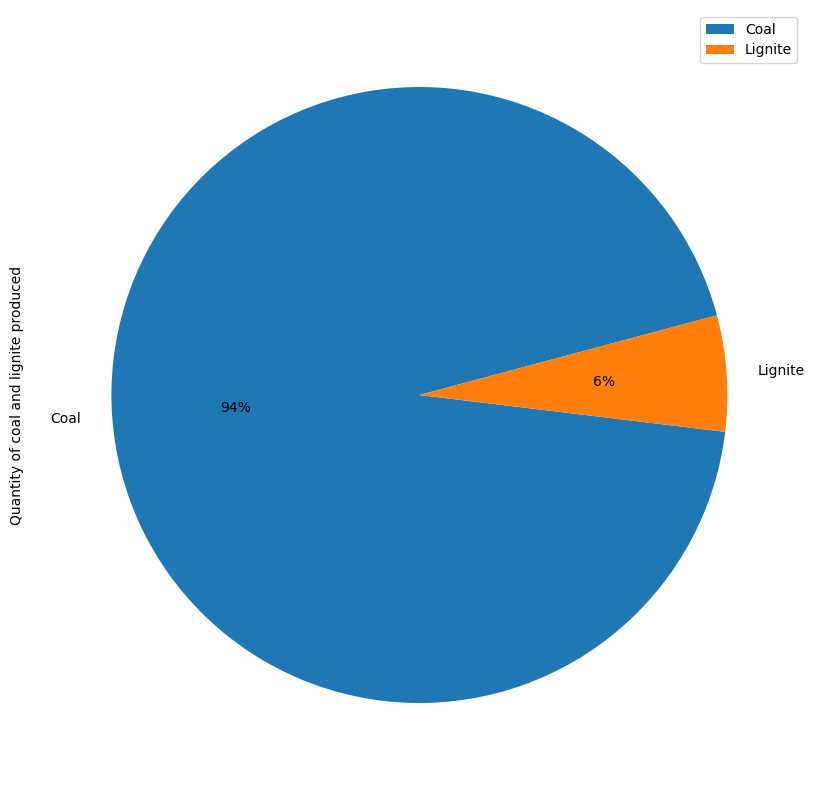

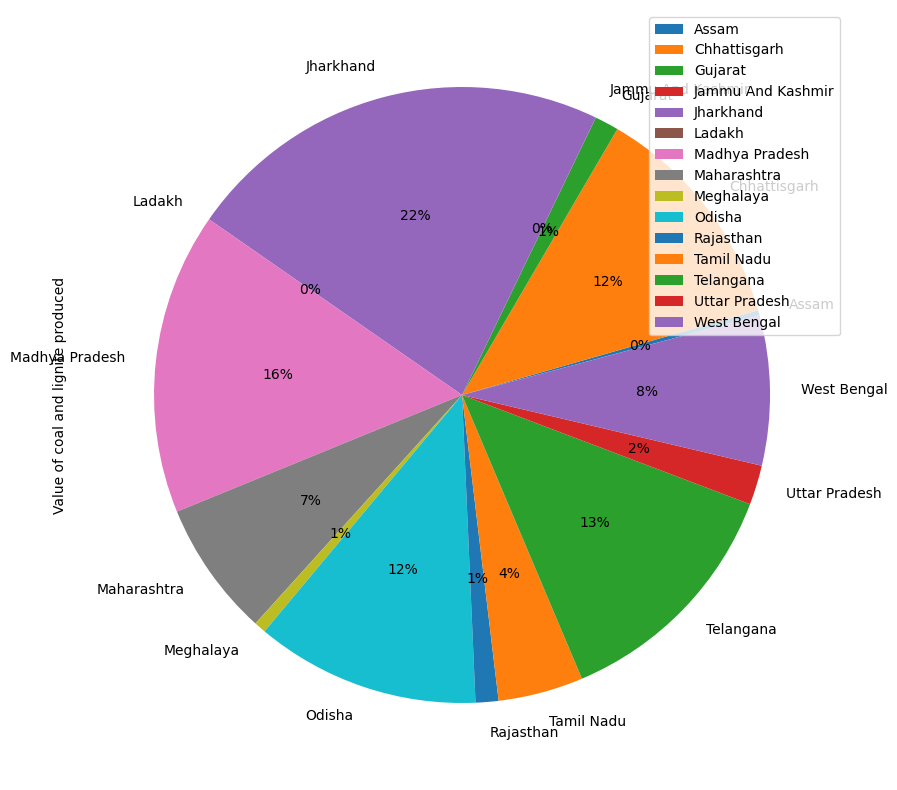

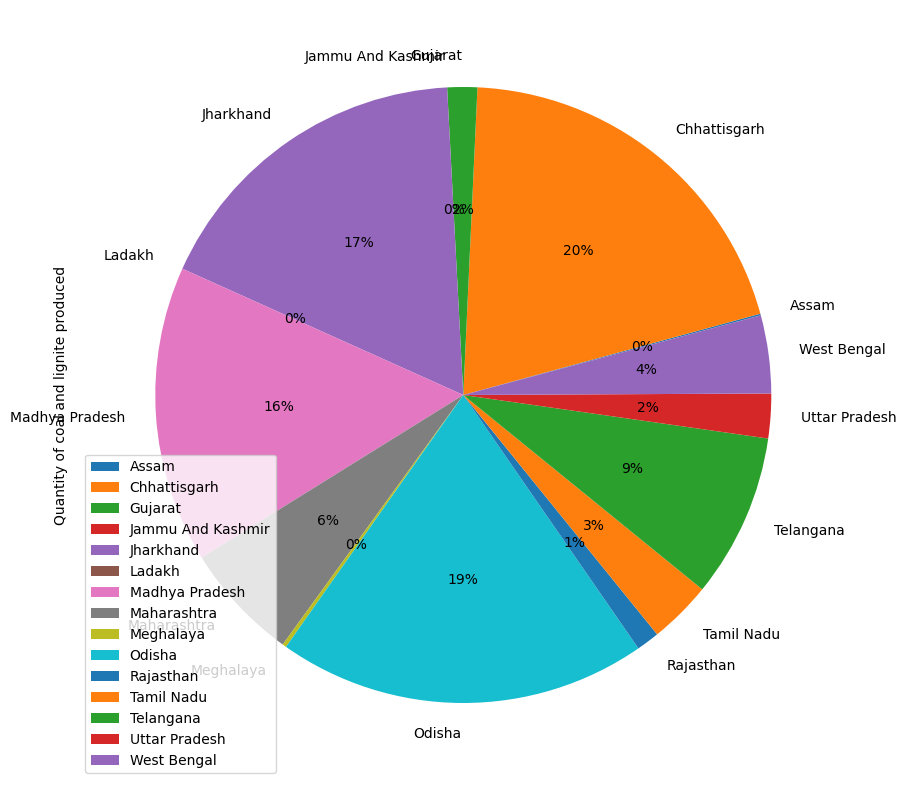

In [29]:
df.groupby(['Coal type']).sum().plot(kind='pie', y='Value of coal and lignite produced',autopct='%1.0f%%',figsize=(10,10),xlabel="Type of coal ",startangle=15)
df.groupby(['Coal type']).sum().plot(kind='pie', y='Quantity of coal and lignite produced',autopct='%1.0f%%',figsize=(10,10),xlabel="Type of coal ",startangle=15)
df.groupby(['State']).sum().plot(kind='pie', y='Value of coal and lignite produced',autopct='%1.0f%%',figsize=(10,10),xlabel="Type of coal ",startangle=15)
df.groupby(['State']).sum().plot(kind='pie', y='Quantity of coal and lignite produced',autopct='%1.0f%%',figsize=(10,10),xlabel="Type of coal ",startangle=15)